In [301]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV

In [302]:
path = "dataset/CO2 Emissions.csv"

In [303]:
data = pd.read_csv(path)

In [304]:
data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [305]:
data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [306]:
cat = ['Make','Model','Vehicle Class','Transmission','Fuel Type']

l_cat = []

for col in cat:
    l_cat.append(list(data[col].unique()))

In [307]:
def replace(x,i):
    return l_cat[i].index(x)

In [308]:
data_enc = data.copy(deep=True)

### Label Encoding

For categorical variables, the variables are encoded with dummy integers representing each category.

In [309]:
for i,col in enumerate(cat):
    data_enc[col] = data_enc[col].apply(replace,args=(i,))

In [310]:
n_s,n_f = data_enc.shape
n_f-=1

tar = "CO2 Emissions(g/km)"

### Scatter Plots


Each independent variable is plotted against the target variable **"CO2 Emissions(g/km)"** to show the relation between the variation in the independent variable and the target variable.


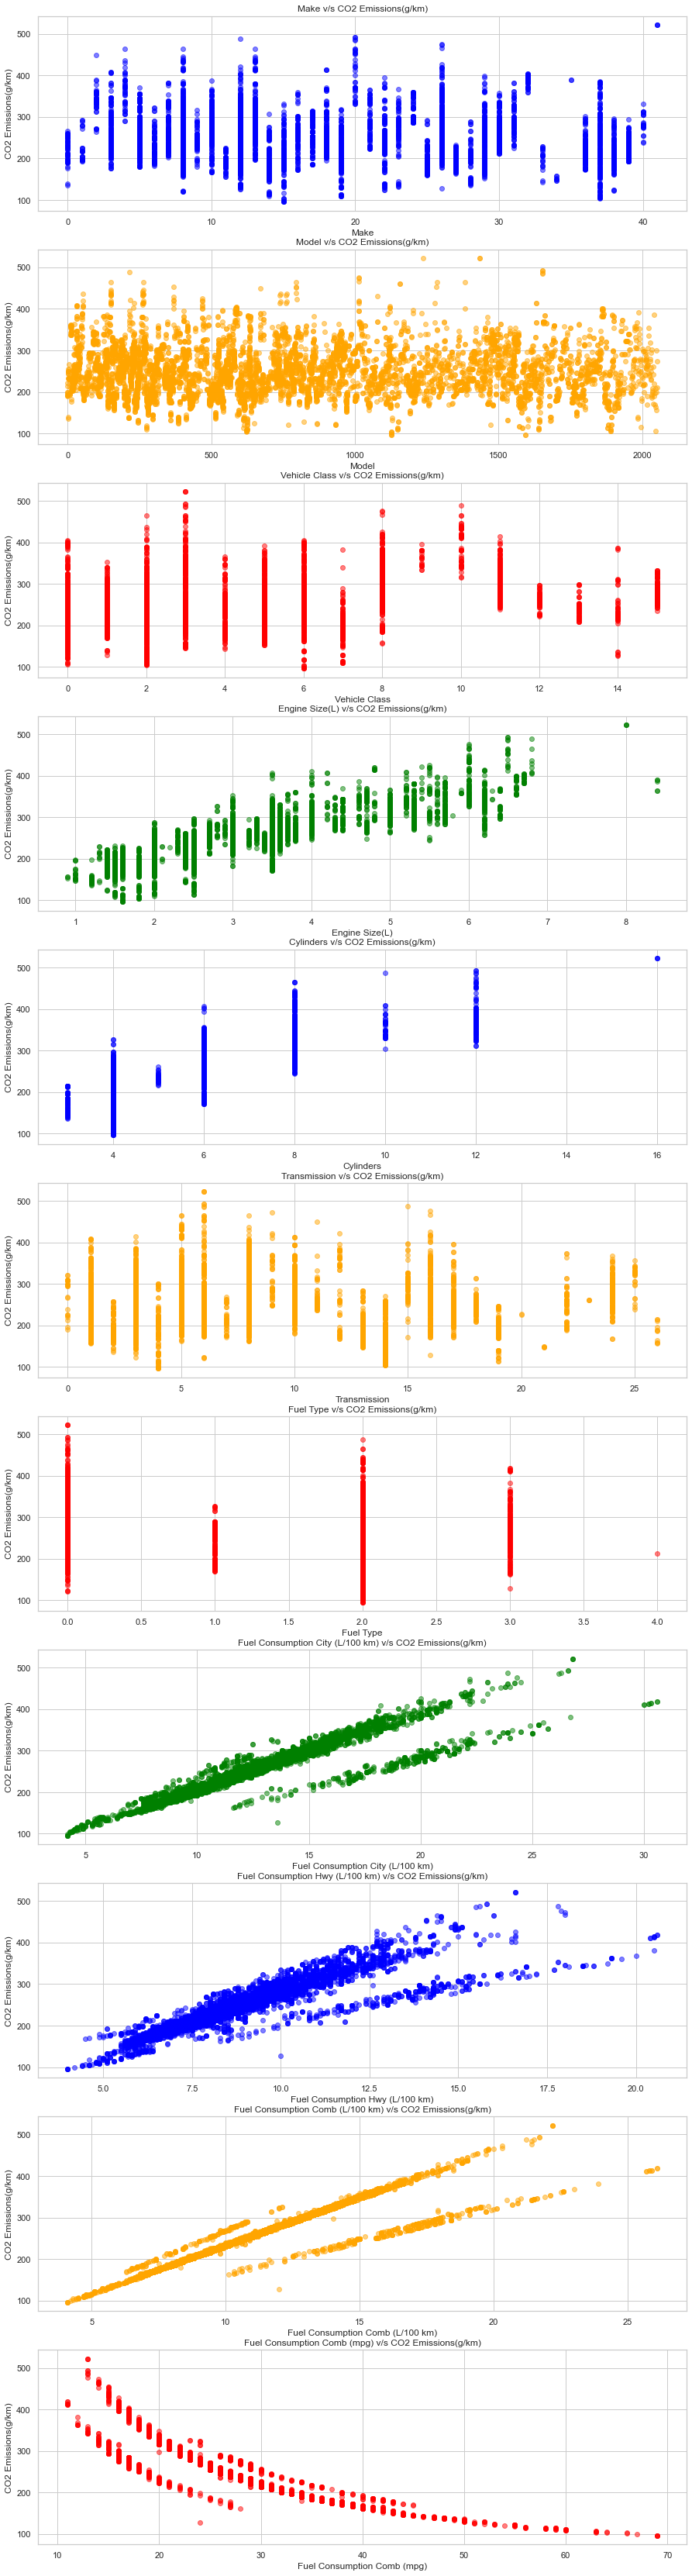

In [311]:
fig, ax = plt.subplots(n_f,1,figsize=(15,60))
colors = ["blue","orange","red","green"]

for i,col in enumerate(data_enc.columns):
    if col == 'CO2 Emissions(g/km)':
        continue

    axis = ax[i] if n_s>1 else ax

    axis.scatter(data_enc[col],data[tar],alpha=0.5,color=colors[(i%4)])
    axis.set_xlabel(col)
    axis.set_ylabel(tar)
    axis.set_title(f"{col} v/s {tar}")

plt.show()

### Pair Plots
Pair plots show the dependency of each variable with the other. This is useful for analysing the correlation between the independent variables.

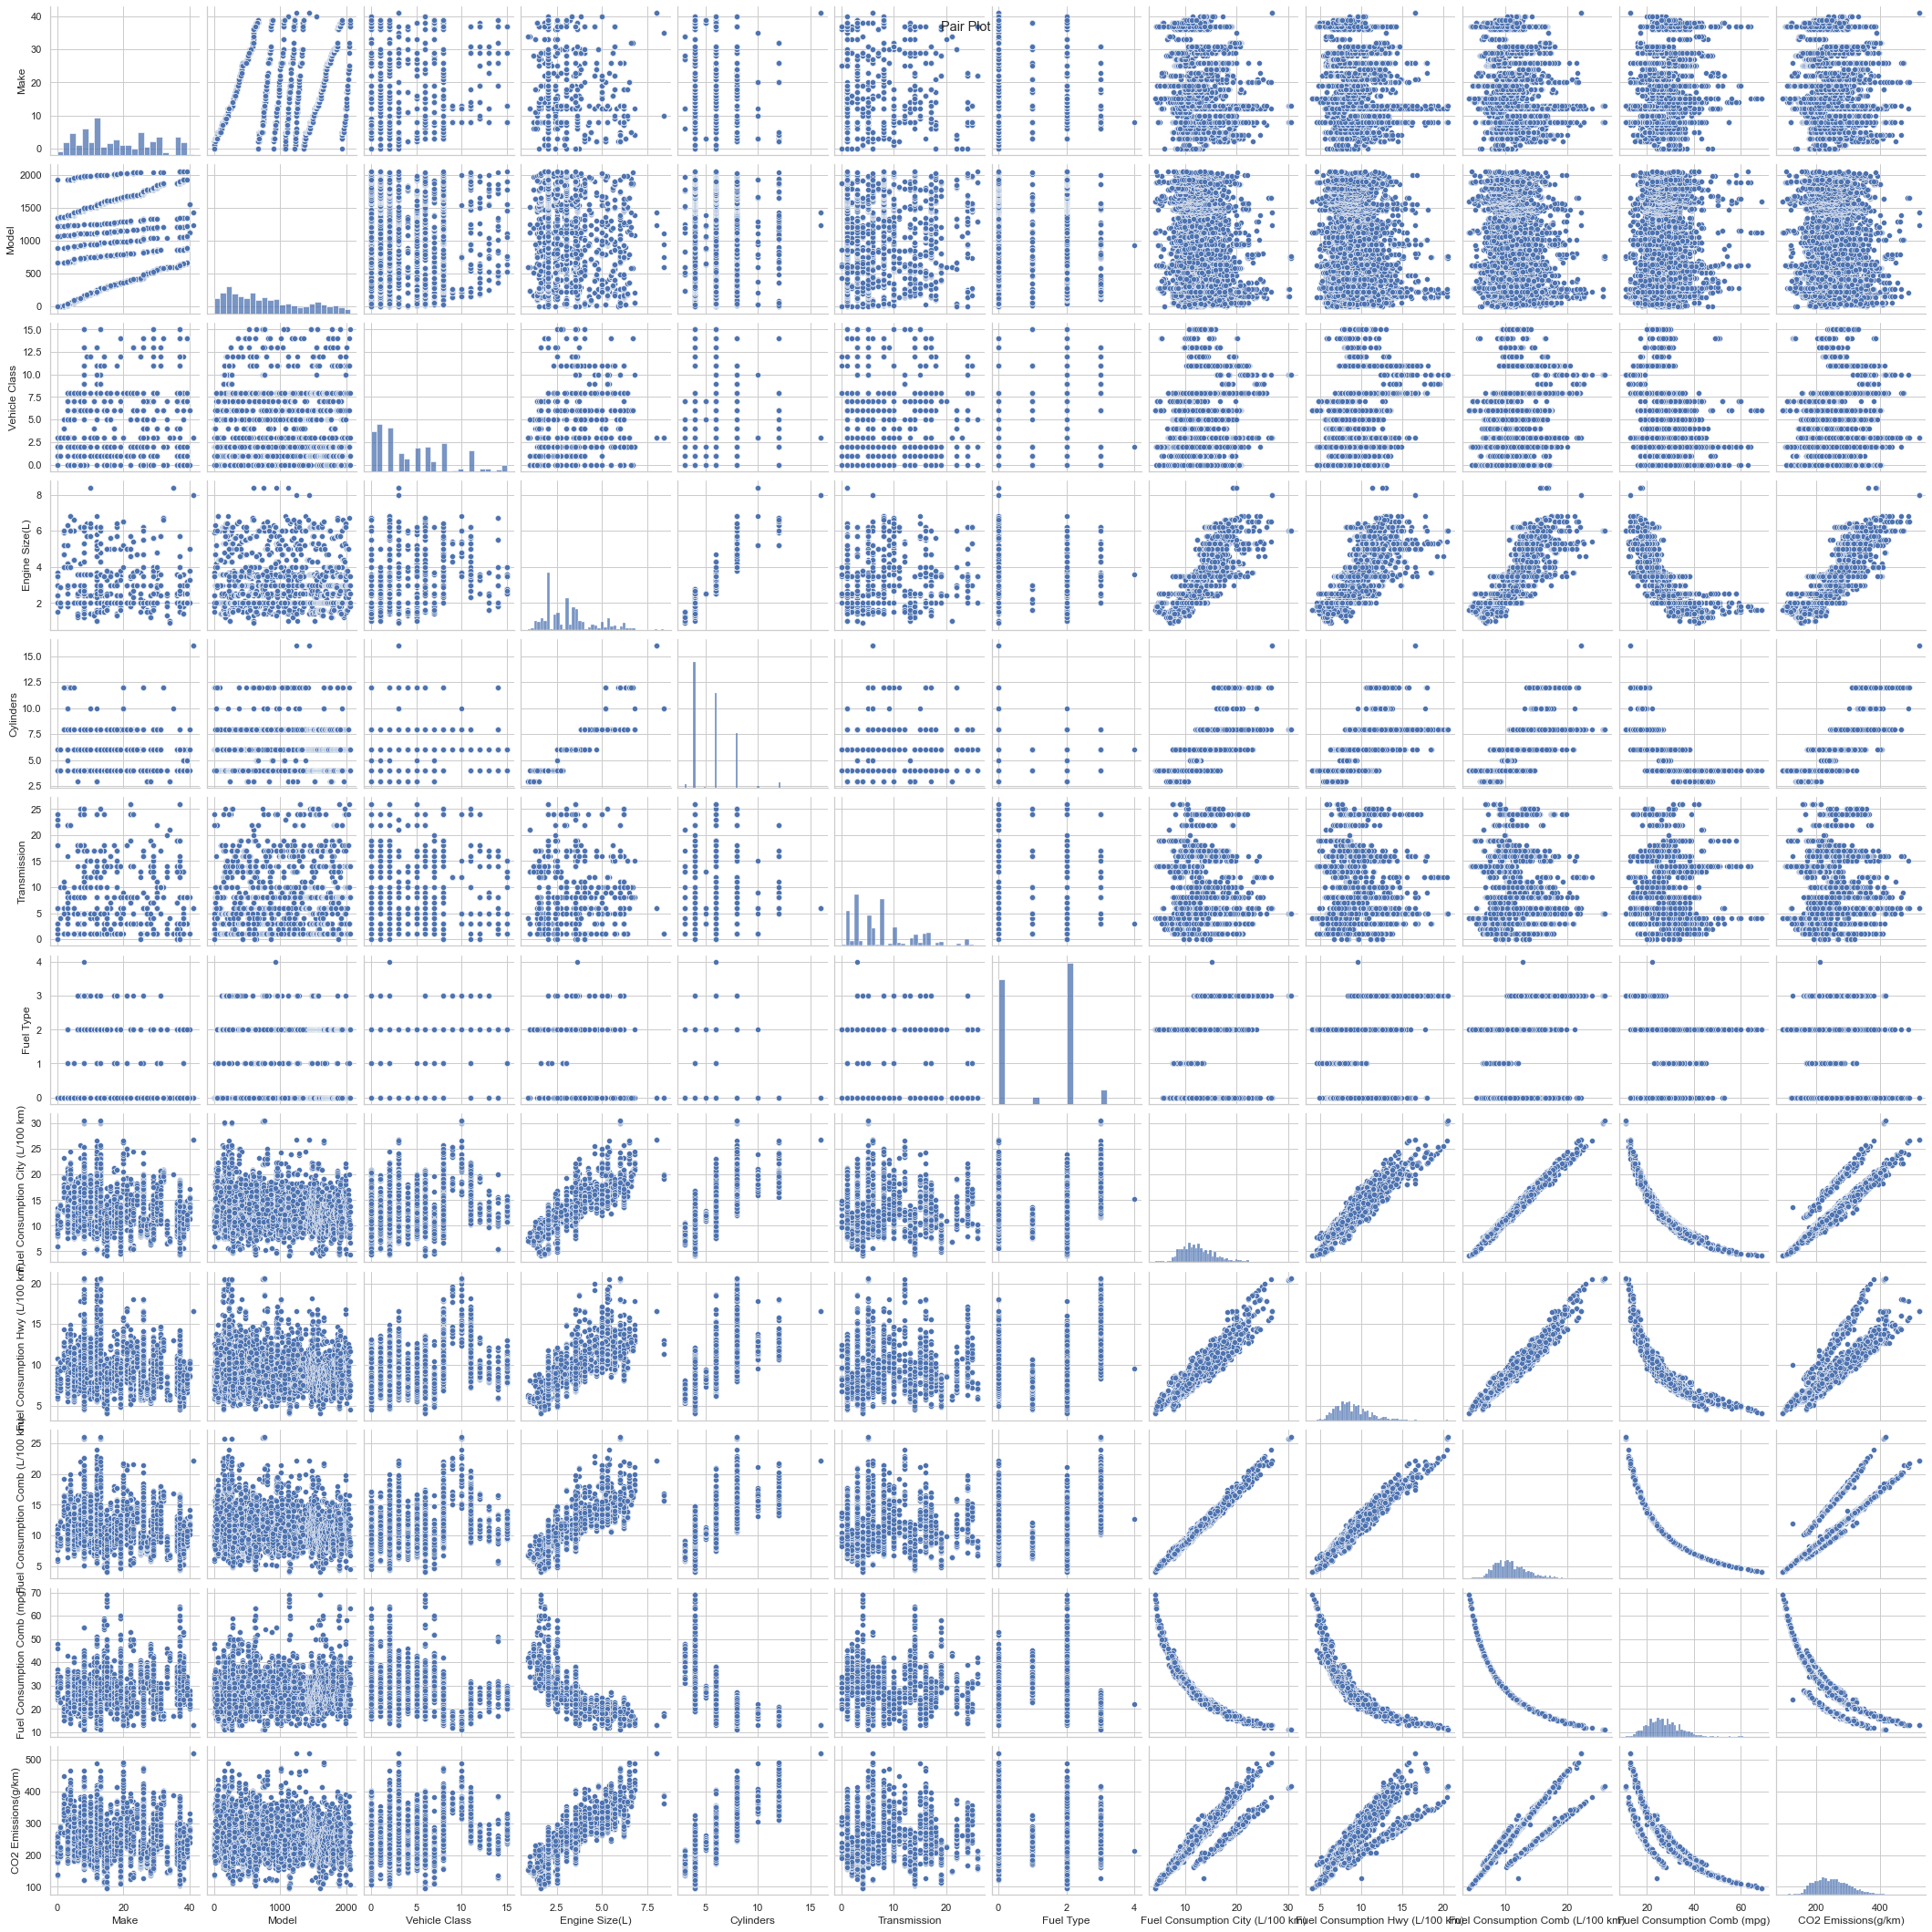

In [312]:
sns.pairplot(data_enc)

plt.suptitle("Pair Plot")
plt.show()

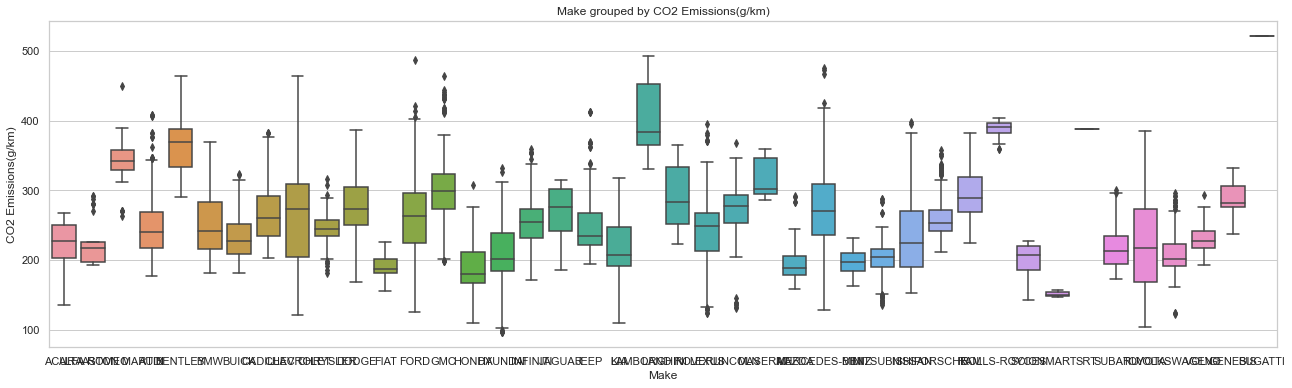

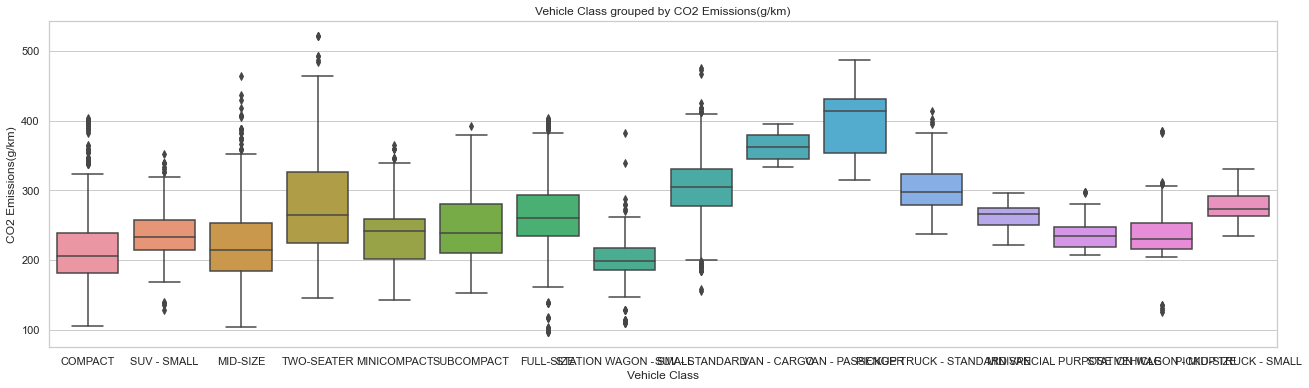

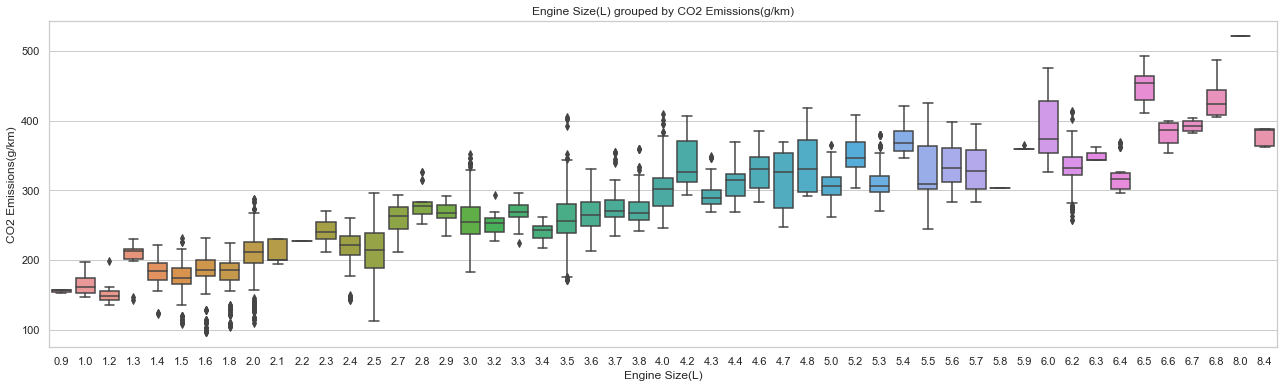

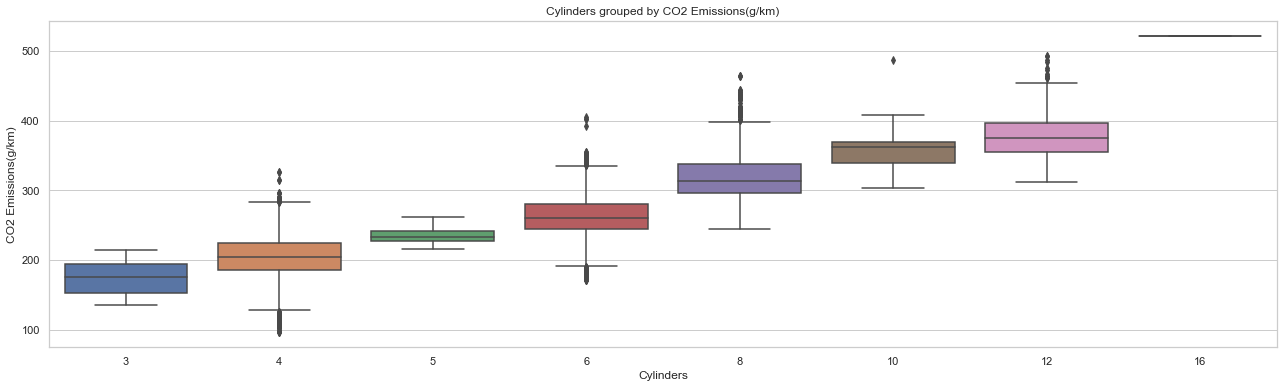

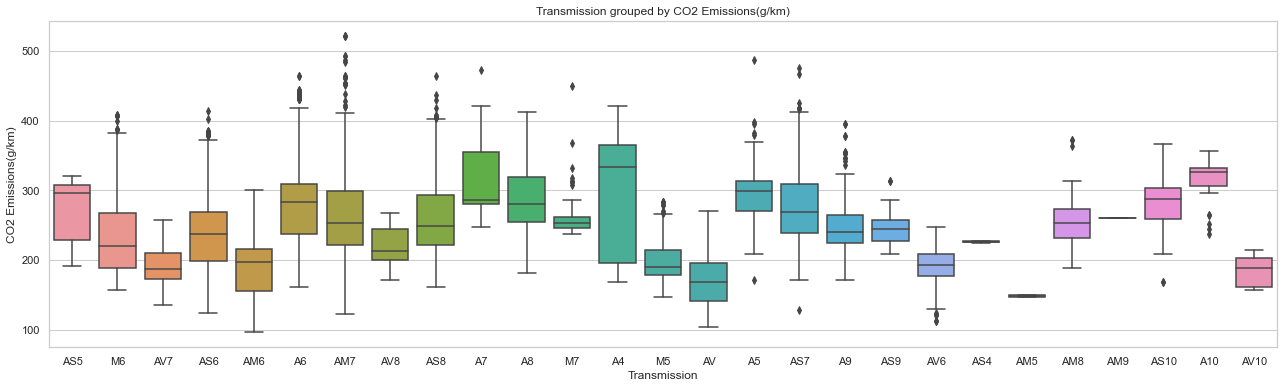

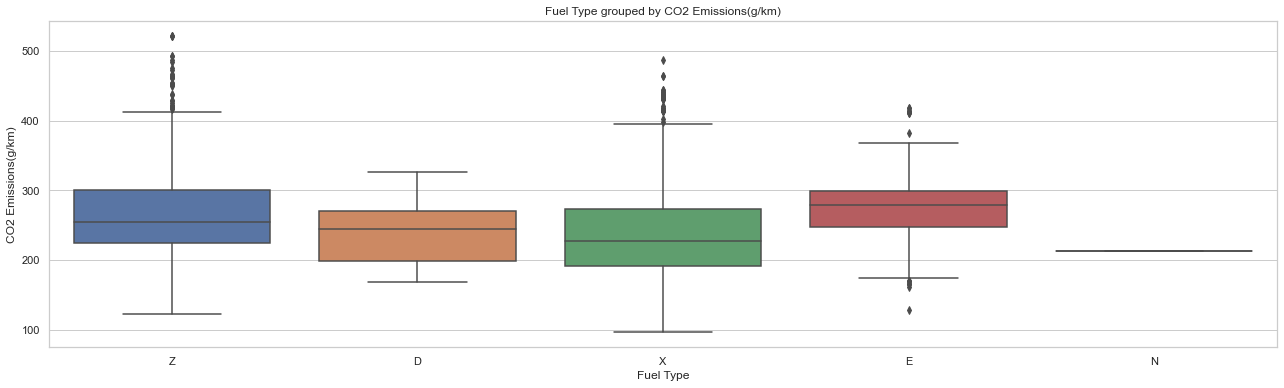

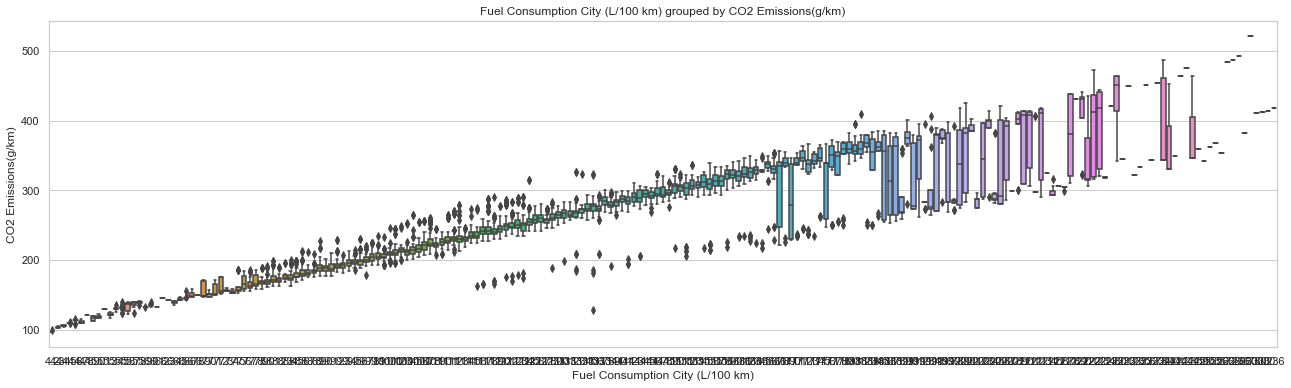

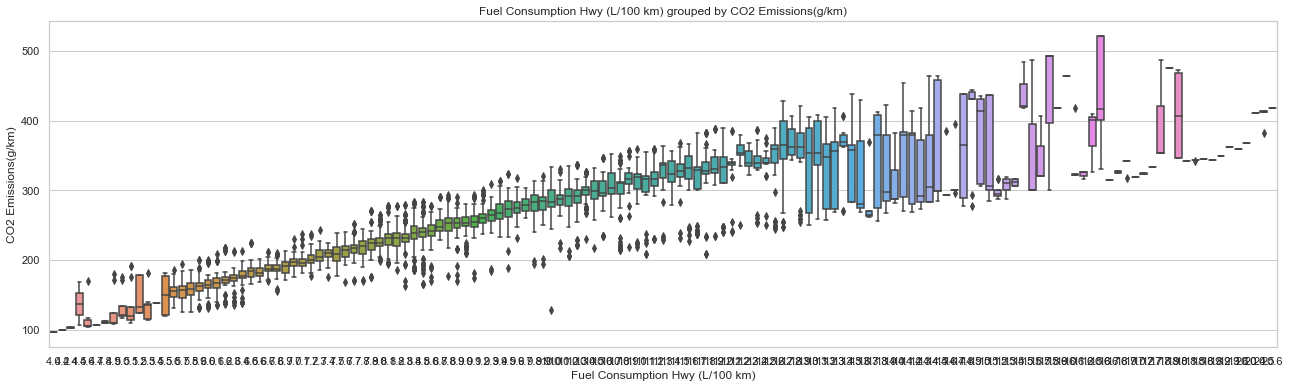

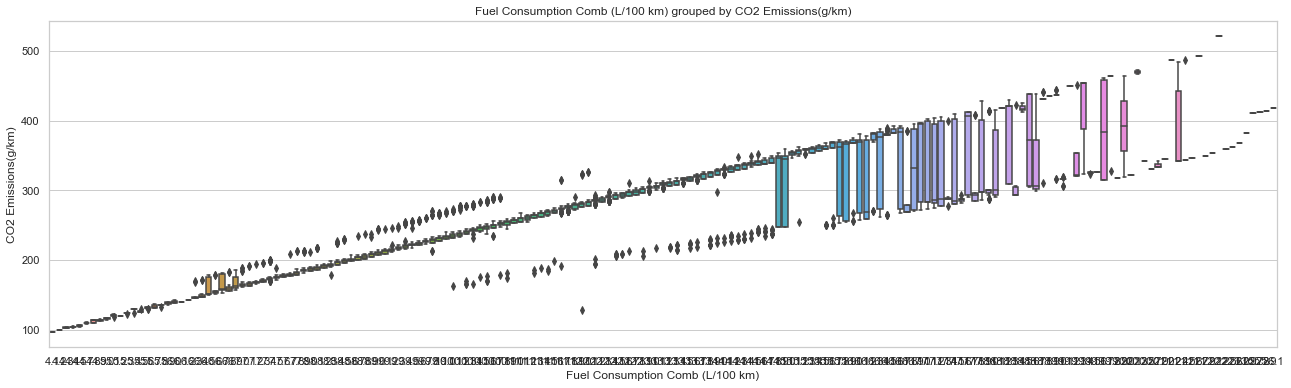

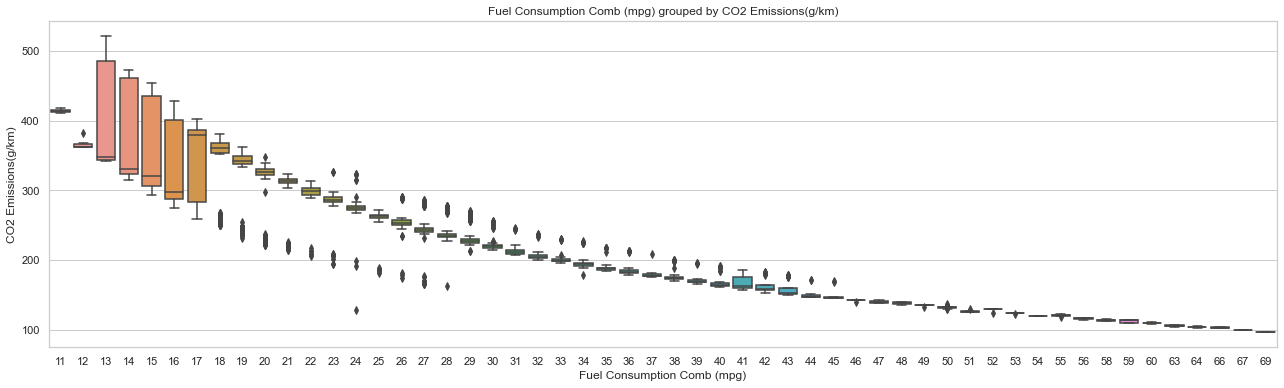

In [313]:
for i,col in enumerate(data.columns):
    if col==tar or col=='Model':
        continue
    
    plt.figure(figsize=(22,6))
    sns.boxplot(x=col,y=tar,data=data)
    plt.title(f"{col} grouped by {tar}")
    plt.show()

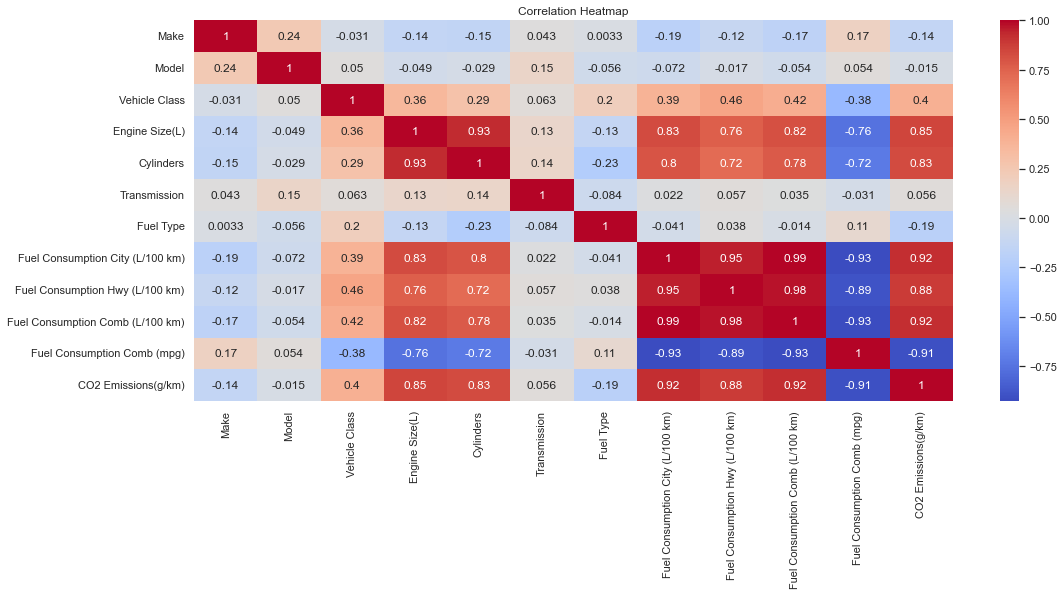

In [314]:
corr = data_enc.corr()

fig,ax = plt.subplots(1,1,figsize=(17,7))

sns.heatmap(corr,annot=True,cmap='coolwarm')

plt.title("Correlation Heatmap")
plt.show()

In [315]:
from sklearn.manifold import TSNE

target = data_enc['CO2 Emissions(g/km)']

X = data_enc.drop(labels=['CO2 Emissions(g/km)'],axis=1)

reduced_2 = TSNE(n_components=2, random_state=42).fit_transform(X)
tsne_data = np.vstack([reduced_2.T,target]).T
tsne_df = pd.DataFrame(data=tsne_data, columns=['Dim1','Dim2','Label'])

In [316]:
tsne_df

,Dim1,Dim2,Label
0,-78.424110,-34.318756,196.0
1,-78.795647,-34.676659,221.0
2,-77.412712,-33.139252,136.0
3,-79.538559,-35.008415,255.0
4,-79.386520,-34.806557,244.0
...,...,...,...
7380,41.334736,59.428398,219.0
7381,30.521311,76.588753,232.0
7382,30.355999,77.020927,240.0
7383,15.027038,16.410194,232.0


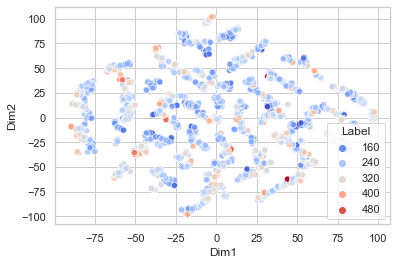

In [317]:
sns.scatterplot(data=tsne_df,x='Dim1',y='Dim2',hue='Label',palette='coolwarm')
plt.show()

In [318]:
data_enc.describe()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,18.208125,791.449425,4.406093,3.160068,5.615030,7.897089,1.159513,12.556534,9.041706,10.975071,27.481652,250.584699
std,10.810674,556.782006,3.919786,1.354170,1.828307,5.889440,1.049951,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.000000,0.000000,0.000000,0.900000,3.000000,0.000000,0.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,8.000000,304.000000,1.000000,2.000000,4.000000,3.000000,0.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,16.000000,655.000000,3.000000,3.000000,6.000000,6.000000,2.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,27.000000,1197.000000,7.000000,3.700000,6.000000,11.000000,2.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,41.000000,2052.000000,15.000000,8.400000,16.000000,26.000000,4.000000,30.600000,20.600000,26.100000,69.000000,522.000000


## Preprocessing

In [319]:
from sklearn.preprocessing import StandardScaler

X_cat = X[cat]
X_num = X.drop(labels=cat,axis=1)

X_num = pd.DataFrame(StandardScaler().fit_transform(X_num),columns=X_num.columns)

X_pro = pd.concat([X_num,X_cat],axis=1)

X_pro

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Make,Model,Vehicle Class,Transmission,Fuel Type
0,-0.856721,-0.883408,-0.759002,-1.052781,-0.855742,0.763110,0,0,0,0,0
1,-0.561317,-0.883408,-0.387577,-0.603202,-0.475423,0.209966,0,0,0,1,0
2,-1.225976,-0.883408,-1.873275,-1.457401,-1.754677,2.837400,0,1,0,2,0
3,0.251043,0.210575,0.040990,0.026208,0.043193,-0.343178,0,2,1,3,0
4,0.251043,0.210575,-0.130437,-0.153624,-0.129679,-0.066606,0,3,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...
7380,-0.856721,-0.883408,-0.530433,-0.603202,-0.544572,0.348252,39,1923,1,8,0
7381,-0.856721,-0.883408,-0.387577,-0.333455,-0.371700,0.209966,39,885,1,8,0
7382,-0.856721,-0.883408,-0.244721,-0.198582,-0.233402,-0.066606,39,887,1,8,0
7383,-0.856721,-0.883408,-0.387577,-0.333455,-0.371700,0.209966,39,1067,8,8,0


In [320]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_train, X_test, Y_train, Y_test = train_test_split(
    X_pro,
    target,
    test_size=0.2,
    shuffle=True,
    random_state=8
)

n_s,n_f = X_train.shape

param_grid_lr = {
    'fit_intercept' : [True],
    'n_jobs' : [-1,None,1],
    'positive' : [True,False]
}

lr = LinearRegression()

gs = GridSearchCV(
    estimator=lr,
    param_grid=param_grid_lr,
    n_jobs=None,
    refit=True,
    cv=5,
    return_train_score=True
)

gs.fit(X_train,Y_train)

lr = gs.best_estimator_
lr.fit(X_train,Y_train)

Y_pred_tr = lr.predict(X_train)
Y_pred = lr.predict(X_test)

mse_tr = mean_squared_error(y_true=Y_train,y_pred=Y_pred_tr,squared=True)
rmse_tr = mean_squared_error(y_true=Y_train,y_pred=Y_pred_tr,squared=False)
r2_tr = r2_score(y_true=Y_train,y_pred=Y_pred_tr,force_finite=True)
adj_r2_tr = 1-(1-r2_tr)*(n_s-1)/(n_s-n_f-1)
mae_tr = mean_absolute_error(y_true=Y_train,y_pred=Y_pred_tr)

mse_ts = mean_squared_error(y_true=Y_test,y_pred=Y_pred,squared=True)
rmse_ts = mean_squared_error(y_true=Y_test,y_pred=Y_pred,squared=False)
r2_ts = r2_score(y_true=Y_test,y_pred=Y_pred,force_finite=True)
adj_r2_ts = 1-(1-r2_ts)*(n_s-1)/(n_s-n_f-1)
mae_ts = mean_absolute_error(y_true=Y_test,y_pred=Y_pred)

print(f"""
Performance on Train set:
      MSE: {mse_tr}
      RMSE: {rmse_tr}
      R2 score: {r2_tr}
      Adjusted R2 score: {adj_r2_tr}
      MAE: {mae_tr}

Performance on Test set:
    MSE: {mse_ts}
    RMSE: {rmse_ts}
    R2 score: {r2_ts}
    Adjusted R2 score: {adj_r2_ts}
    MAE: {mae_ts}
""")


Performance on Train set:
      MSE: 292.3107333654392
      RMSE: 17.09709722044766
      R2 score: 0.9141586281491605
      Adjusted R2 score: 0.913998476336006
      MAE: 11.604193652364458

Performance on Test set:
    MSE: 279.37573811472396
    RMSE: 16.714536730484753
    R2 score: 0.9200728127273329
    Adjusted R2 score: 0.9199236948406302
    MAE: 11.319165859676161



In [321]:
gs.best_params_

{'fit_intercept': True, 'n_jobs': -1, 'positive': False}

In [322]:
from sklearn.decomposition import PCA

num_features = range(4,11,2)

for num in num_features:
    pca = PCA(
        n_components=num,
        copy=True,
        whiten=True,
        svd_solver='auto',
        tol=1e-10,
        random_state=8
    )

    X_pca = pca.fit_transform(X)

    n_f = X_pca.shape[1]

    X_train, X_test, Y_train, Y_test = train_test_split(
        X_pca,
        target,
        test_size=0.2,
        shuffle=True,
        random_state=8
    )

    lr = LinearRegression()

    gs = GridSearchCV(
        estimator=lr,
        param_grid=param_grid_lr,
        n_jobs=None,
        refit=True,
        cv=5,
        return_train_score=True
    )

    gs.fit(X_train,Y_train)

    lr = gs.best_estimator_
    lr.fit(X_train,Y_train)

    Y_pred_tr = lr.predict(X_train)
    Y_pred = lr.predict(X_test)

    mse_tr = mean_squared_error(y_true=Y_train,y_pred=Y_pred_tr,squared=True)
    rmse_tr = mean_squared_error(y_true=Y_train,y_pred=Y_pred_tr,squared=False)
    r2_tr = r2_score(y_true=Y_train,y_pred=Y_pred_tr,force_finite=True)
    adj_r2_tr = 1-(1-r2_tr)*(n_s-1)/(n_s-n_f-1)
    mae_tr = mean_absolute_error(y_true=Y_train,y_pred=Y_pred_tr)

    mse_ts = mean_squared_error(y_true=Y_test,y_pred=Y_pred,squared=True)
    rmse_ts = mean_squared_error(y_true=Y_test,y_pred=Y_pred,squared=False)
    r2_ts = r2_score(y_true=Y_test,y_pred=Y_pred,force_finite=True)
    adj_r2_ts = 1-(1-r2_ts)*(n_s-1)/(n_s-n_f-1)
    mae_ts = mean_absolute_error(y_true=Y_test,y_pred=Y_pred)

    print(f"""
    Number of features taken: {num}      
        Performance on Train set:
            MSE: {mse_tr}
            RMSE: {rmse_tr}
            R2 score: {r2_tr}
            Adjusted R2 score: {adj_r2_tr}
            MAE: {mae_tr}

        Performance on Test set:
            MSE: {mse_ts}
            RMSE: {rmse_ts}
            R2 score: {r2_ts}
            Adjusted R2 score: {adj_r2_ts}
            MAE: {mae_ts}

    """)

In [ ]:
X = data.drop(labels=['CO2 Emissions(g/km)'],axis=1)

data_cat = X[cat]
data_num = X.drop(labels=cat,axis=1)

data_num_std = pd.DataFrame(
    StandardScaler().fit_transform(X=data_num),
    columns=data_num.columns
)

data_cat_enc = pd.get_dummies(
    data=data_cat,
    drop_first=False
)

data_oh_enc = pd.concat([data_num_std,data_cat_enc],axis=1)

In [ ]:
data_oh_enc

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,-0.856721,-0.883408,-0.759002,-1.052781,-0.855742,0.763110,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.561317,-0.883408,-0.387577,-0.603202,-0.475423,0.209966,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,-1.225976,-0.883408,-1.873275,-1.457401,-1.754677,2.837400,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.251043,0.210575,0.040990,0.026208,0.043193,-0.343178,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.251043,0.210575,-0.130437,-0.153624,-0.129679,-0.066606,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,-0.856721,-0.883408,-0.530433,-0.603202,-0.544572,0.348252,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7381,-0.856721,-0.883408,-0.387577,-0.333455,-0.371700,0.209966,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7382,-0.856721,-0.883408,-0.244721,-0.198582,-0.233402,-0.066606,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7383,-0.856721,-0.883408,-0.387577,-0.333455,-0.371700,0.209966,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    data_oh_enc,
    target,
    test_size=0.2,
    shuffle=True,
    random_state=8
)

lr = LinearRegression(
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False
)

lr.fit(X_train,Y_train)

Y_pred_tr = lr.predict(X_train)
Y_pred = lr.predict(X_test)

mse_tr = mean_squared_error(y_true=Y_train,y_pred=Y_pred_tr,squared=True)
rmse_tr = mean_squared_error(y_true=Y_train,y_pred=Y_pred_tr,squared=False)
r2_tr = r2_score(y_true=Y_train,y_pred=Y_pred_tr,force_finite=True)
adj_r2_tr = 1-(1-r2_tr)*(n_s-1)/(n_s-n_f-1)
mae_tr = mean_absolute_error(y_true=Y_train,y_pred=Y_pred_tr)

mse_ts = mean_squared_error(y_true=Y_test,y_pred=Y_pred,squared=True)
rmse_ts = mean_squared_error(y_true=Y_test,y_pred=Y_pred,squared=False)
r2_ts = r2_score(y_true=Y_test,y_pred=Y_pred,force_finite=True)
adj_r2_ts = 1-(1-r2_ts)*(n_s-1)/(n_s-n_f-1)
mae_ts = mean_absolute_error(y_true=Y_test,y_pred=Y_pred)

print(f"""
Performance on Train set:
      MSE: {mse_tr}
      RMSE: {rmse_tr}
      R2 score: {r2_tr}
      Adjusted R2 score: {adj_r2_tr}
      MAE: {mae_tr}

Performance on Test set:
    MSE: {mse_ts}
    RMSE: {rmse_ts}
    R2 score: {r2_ts}
    Adjusted R2 score: {adj_r2_ts}
    MAE: {mae_ts}
""")


Performance on Train set:
      MSE: 9.11357865443506
      RMSE: 3.0188704269039204
      R2 score: 0.9973236627845985
      Adjusted R2 score: 0.9973191243121288
      MAE: 1.930412530737627

Performance on Test set:
    MSE: 1.4392706133678346e+17
    RMSE: 379377201.92017794
    R2 score: -41176392992098.47
    Adjusted R2 score: -41246218993441.695
    MAE: 75710805.9037506



In [ ]:
from sklearn.decomposition import PCA

num_features = [400,500,600,700,800]

for num in num_features:
    pca = PCA(
        n_components=num,
        copy=True,
        whiten=True,
        svd_solver='auto',
        tol=0,
        random_state=8
    )

    X_pca = pca.fit_transform(data_oh_enc)

    n_f = X_pca.shape[1]

    X_train, X_test, Y_train, Y_test = train_test_split(
        X_pca,
        target,
        test_size=0.2,
        shuffle=True,
        random_state=8
    )

    lr = LinearRegression()

    gs = GridSearchCV(
        estimator=lr,
        param_grid=param_grid_lr,
        n_jobs=None,
        refit=True,
        cv=5,
        return_train_score=True
    )

    gs.fit(X_train,Y_train)

    lr = gs.best_estimator_
    lr.fit(X_train,Y_train)

    Y_pred_tr = lr.predict(X_train)
    Y_pred = lr.predict(X_test)

    mse_tr = mean_squared_error(y_true=Y_train,y_pred=Y_pred_tr,squared=True)
    rmse_tr = mean_squared_error(y_true=Y_train,y_pred=Y_pred_tr,squared=False)
    r2_tr = r2_score(y_true=Y_train,y_pred=Y_pred_tr,force_finite=True)
    adj_r2_tr = 1-(1-r2_tr)*(n_s-1)/(n_s-n_f-1)
    mae_tr = mean_absolute_error(y_true=Y_train,y_pred=Y_pred_tr)

    mse_ts = mean_squared_error(y_true=Y_test,y_pred=Y_pred,squared=True)
    rmse_ts = mean_squared_error(y_true=Y_test,y_pred=Y_pred,squared=False)
    r2_ts = r2_score(y_true=Y_test,y_pred=Y_pred,force_finite=True)
    adj_r2_ts = 1-(1-r2_ts)*(n_s-1)/(n_s-n_f-1)
    mae_ts = mean_absolute_error(y_true=Y_test,y_pred=Y_pred)

    print(f"""
    Number of features taken: {num}      
        Performance on Train set:
            MSE: {mse_tr}
            RMSE: {rmse_tr}
            R2 score: {r2_tr}
            Adjusted R2 score: {adj_r2_tr}
            MAE: {mae_tr}

        Performance on Test set:
            MSE: {mse_ts}
            RMSE: {rmse_ts}
            R2 score: {r2_ts}
            Adjusted R2 score: {adj_r2_ts}
            MAE: {mae_ts}

    """)


    Number of features taken: 400      
        Performance on Train set:
            MSE: 19.60370956078714
            RMSE: 4.427607656600474
            R2 score: 0.994243080633103
            Adjusted R2 score: 0.9938249277827745
            MAE: 2.7630255523142826

        Performance on Test set:
            MSE: 19.8184596336766
            RMSE: 4.451792856106021
            R2 score: 0.9943300955720564
            Adjusted R2 score: 0.9939182630368871
            MAE: 2.9396479663745487

    

    Number of features taken: 500      
        Performance on Train set:
            MSE: 18.77729935599381
            RMSE: 4.333278130468181
            R2 score: 0.9944857682172167
            Adjusted R2 score: 0.9939758522025336
            MAE: 2.706745413766306

        Performance on Test set:
            MSE: 19.40976752439977
            RMSE: 4.405651770669099
            R2 score: 0.9944470191495134
            Adjusted R2 score: 0.9939335199031211
            MAE: 2.9088

In [ ]:
from sklearn.linear_model import Lasso, Ridge

X_train, X_test, Y_train, Y_test = train_test_split(
    X_pro,
    target,
    test_size=0.2,
    shuffle=True,
    random_state=8
)
n_s,n_f = X_train.shape

lasso = Lasso(
    alpha=0.05,
    fit_intercept=True,
    max_iter=10000,
    positive=False,
    random_state=8,
    tol=1e-15,
    warm_start=False
)

lasso.fit(X_train,Y_train)

Y_pred_tr = lasso.predict(X_train)
Y_pred = lasso.predict(X_test)

mse_tr = mean_squared_error(y_true=Y_train,y_pred=Y_pred_tr,squared=True)
rmse_tr = mean_squared_error(y_true=Y_train,y_pred=Y_pred_tr,squared=False)
r2_tr = r2_score(y_true=Y_train,y_pred=Y_pred_tr,force_finite=True)
adj_r2_tr = 1-(1-r2_tr)*(n_s-1)/(n_s-n_f-1)
mae_tr = mean_absolute_error(y_true=Y_train,y_pred=Y_pred_tr)

mse_ts = mean_squared_error(y_true=Y_test,y_pred=Y_pred,squared=True)
rmse_ts = mean_squared_error(y_true=Y_test,y_pred=Y_pred,squared=False)
r2_ts = r2_score(y_true=Y_test,y_pred=Y_pred,force_finite=True)
adj_r2_ts = 1-(1-r2_ts)*(n_s-1)/(n_s-n_f-1)
mae_ts = mean_absolute_error(y_true=Y_test,y_pred=Y_pred)

print(f"""
Linear Regression with L1 (LASSO) Regularization:     
    Performance on Train set:
        MSE: {mse_tr}
        RMSE: {rmse_tr}
        R2 score: {r2_tr}
        Adjusted R2 score: {adj_r2_tr}
        MAE: {mae_tr}

    Performance on Test set:
        MSE: {mse_ts}
        RMSE: {rmse_ts}
        R2 score: {r2_ts}
        Adjusted R2 score: {adj_r2_ts}
        MAE: {mae_ts}
""")


ridge = Ridge(
    alpha=24,
    fit_intercept=True,
    max_iter=5000,
    tol=1e-15,
    solver='auto',
    random_state=8
)

ridge.fit(X_train,Y_train)

Y_pred_tr = ridge.predict(X_train)
Y_pred = ridge.predict(X_test)

mse_tr = mean_squared_error(y_true=Y_train,y_pred=Y_pred_tr,squared=True)
rmse_tr = mean_squared_error(y_true=Y_train,y_pred=Y_pred_tr,squared=False)
r2_tr = r2_score(y_true=Y_train,y_pred=Y_pred_tr,force_finite=True)
adj_r2_tr = 1-(1-r2_tr)*(n_s-1)/(n_s-n_f-1)
mae_tr = mean_absolute_error(y_true=Y_train,y_pred=Y_pred_tr)

mse_ts = mean_squared_error(y_true=Y_test,y_pred=Y_pred,squared=True)
rmse_ts = mean_squared_error(y_true=Y_test,y_pred=Y_pred,squared=False)
r2_ts = r2_score(y_true=Y_test,y_pred=Y_pred,force_finite=True)
adj_r2_ts = 1-(1-r2_ts)*(n_s-1)/(n_s-n_f-1)
mae_ts = mean_absolute_error(y_true=Y_test,y_pred=Y_pred)

print(f"""
Linear Regression with L2 (Ridge Regression) Regularization:     
    Performance on Train set:
        MSE: {mse_tr}
        RMSE: {rmse_tr}
        R2 score: {r2_tr}
        Adjusted R2 score: {adj_r2_tr}
        MAE: {mae_tr}

    Performance on Test set:
        MSE: {mse_ts}
        RMSE: {rmse_ts}
        R2 score: {r2_ts}
        Adjusted R2 score: {adj_r2_ts}
        MAE: {mae_ts}
""")


Linear Regression with L1 (LASSO) Regularization:     
    Performance on Train set:
        MSE: 292.34659382454373
        RMSE: 17.09814591774628
        R2 score: 0.914148097194757
        Adjusted R2 score: 0.9139879257342994
        MAE: 11.591493968945871

    Performance on Test set:
        MSE: 279.33437487428796
        RMSE: 16.713299341371467
        R2 score: 0.9200846464230104
        Adjusted R2 score: 0.919935550614098
        MAE: 11.305182281238864


Linear Regression with L2 (Ridge Regression) Regularization:     
    Performance on Train set:
        MSE: 292.4150039454139
        RMSE: 17.100146313567436
        R2 score: 0.9141280075505747
        Adjusted R2 score: 0.9139677986094377
        MAE: 11.611359426827896

    Performance on Test set:
        MSE: 279.44791296544224
        RMSE: 16.71669563536533
        R2 score: 0.9200521640738433
        Adjusted R2 score: 0.9199030076635333
        MAE: 11.316980439055115



In [ ]:
gs_r.best_params_

{'alpha': 24,
 'fit_intercept': True,
 'max_iter': 5000,
 'random_state': 8,
 'solver': 'auto',
 'tol': 1e-15}

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(
    alpha=0.001,
    early_stopping=False,
    epsilon=1,
    eta0=0.0001,
    fit_intercept=True,
    learning_rate='optimal',
    loss='huber',
    max_iter=5000,
    penalty='l2',
    power_t=0.0025,
    random_state=8,
    shuffle=False,
    tol=1e-10,
    validation_fraction=0.1,
    warm_start=False
)

sgd.fit(X_train,Y_train)

Y_pred_tr = sgd.predict(X_train)
Y_pred = sgd.predict(X_test)

mse_tr = mean_squared_error(y_true=Y_train,y_pred=Y_pred_tr,squared=True)
rmse_tr = mean_squared_error(y_true=Y_train,y_pred=Y_pred_tr,squared=False)
r2_tr = r2_score(y_true=Y_train,y_pred=Y_pred_tr,force_finite=True)
adj_r2_tr = 1-(1-r2_tr)*(n_s-1)/(n_s-n_f-1)
mae_tr = mean_absolute_error(y_true=Y_train,y_pred=Y_pred_tr)

mse_ts = mean_squared_error(y_true=Y_test,y_pred=Y_pred,squared=True)
rmse_ts = mean_squared_error(y_true=Y_test,y_pred=Y_pred,squared=False)
r2_ts = r2_score(y_true=Y_test,y_pred=Y_pred,force_finite=True)
adj_r2_ts = 1-(1-r2_ts)*(n_s-1)/(n_s-n_f-1)
mae_ts = mean_absolute_error(y_true=Y_test,y_pred=Y_pred)

print(f"""
Linear Regression with SGD:     
    Performance on Train set:
        MSE: {mse_tr}
        RMSE: {rmse_tr}
        R2 score: {r2_tr}
        Adjusted R2 score: {adj_r2_tr}
        MAE: {mae_tr}

    Performance on Test set:
        MSE: {mse_ts}
        RMSE: {rmse_ts}
        R2 score: {r2_ts}
        Adjusted R2 score: {adj_r2_ts}
        MAE: {mae_ts}
""")



Linear Regression with SGD:     
    Performance on Train set:
        MSE: 465.91099293096624
        RMSE: 21.58497146004521
        R2 score: 0.8631783433570298
        Adjusted R2 score: 0.8629230790722482
        MAE: 16.06143064028334

    Performance on Test set:
        MSE: 451.1535093762823
        RMSE: 21.24037451120583
        R2 score: 0.8709285520783787
        Adjusted R2 score: 0.8706877471382264
        MAE: 15.860132823454421

